# roAp Classification of NGC 2264 using Vectorization
### $->$ Not using regressions, like in CS 455 project.

In [15]:
# General packages
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from sympy import *
# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')

### 1. Importing csv files containing NGC 2264 and known roAps
        'roAp' is the csv file including the field roAps
        'clust' is the csv file including NGC 2264 cluster stars

In [18]:
r = pd.read_csv('Data/field_roAp_gaiaNstarhorse.csv', index_col=False)
c = pd.read_csv('Data/parallax_selected_NGC2264.csv', index_col=False)
rfeat = r.columns
cfeat = c.columns
# Dataframe of each dataset
roAp = pd.DataFrame(r)
clust = pd.DataFrame(c)
# Extracting features of all datasets
yr = (roAp['GMAG0']).values
yc = (clust['GMAG0']).values
xr = (roAp['BP-RP0']).values
xc = (clust['BP-RP0']).values

print('Total Dataset for field roAps:', roAp.shape)
print('Total Dataset for Cluster:', clust.shape)

Total Dataset for field roAps: (87, 120)
Total Dataset for Cluster: (738, 194)


#### 1.1 Transposing x and y datasets, calculating the angle between cluster and roAp positions, and calculating the resultant vector between cluster and roAp stars.

In [19]:
# For roAp dataset
xr_array = np.array([xr])
xrp_array = xr_array.transpose()

yr_array = np.array([yr])
yrp_array = yr_array.transpose()

# For cluster dataset
xc_array = np.array([xc])
yc_array = np.array([yc])

# Only transposing one so that we can evenly distribute the values
xrc = (xrp_array-xc_array)
yrc = (yrp_array-yc_array)
print('Complete BP-RP shape:',xrc.shape)
print('Complete GMAG shape:',yrc.shape)
# Finding the angle using arctan(opposite/adjacent)
theta = np.arctan(yrc/xrc)
theta = np.array(theta)
rd = (xrc**2+yrc**2)**(1/2) # Resultant vector for the distance between cluster and roAp stars

Complete BP-RP shape: (87, 738)
Complete GMAG shape: (87, 738)


#### 1.2 Making roAp and cluster sigma NxM arrays so vectorization may be done

In [20]:
# Error values for roAp and cluster
gmre = np.array([(roAp['phot_g_mean_mag_error'])])
bp_rp_re = np.array([((roAp['phot_bp_mean_mag_error']))-((roAp['phot_rp_mean_mag_error']))])
gmce = np.array([(clust['phot_g_mean_mag_error'])])
bp_rp_ce = np.array([((clust['phot_bp_mean_mag_error']))-((clust['phot_rp_mean_mag_error']))])
# Squaring all terms
sq_gmre = gmre**2
sq_bp_rp_re = bp_rp_re**2
sq_gmce = gmce**2
sq_bp_rp_ce = bp_rp_ce**2
# Transposing roAp array 
gmre_p = (sq_gmre.transpose())
bp_rp_rep = (sq_bp_rp_re.transpose())
# Sigma squared terms
gme = (gmre_p+sq_gmce)
bp_rp_e = (bp_rp_rep+sq_bp_rp_ce)
# Calculating sqrt(Sigma) from all errors
sig_gme = (gme)**(1/2)
sig_bp_rp_e = (bp_rp_e)**(1/2)
print('GMAG Sigma shape:',sig_gme.shape, '\nBP-RP Sigma shape:',sig_bp_rp_e.shape)

GMAG Sigma shape: (87, 738) 
BP-RP Sigma shape: (87, 738)


#### 2.0 Plotting the CMD to give visual of data to be analyzed

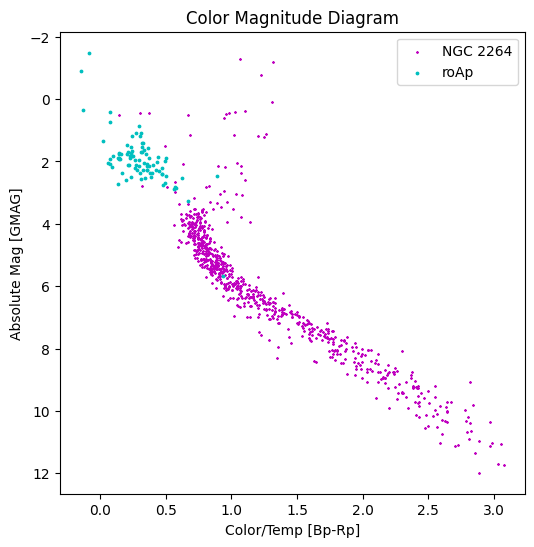

In [21]:
fig, ax = plt.subplots(1,figsize=(6,6))

plt.scatter(x=xc,y=yc,marker='*',c='m',label='NGC 2264',s=1)
plt.scatter(x=xr,y=yr,c='c',label='roAp',s=3)

plt.gca().invert_yaxis()

plt.title('Color Magnitude Diagram')
plt.ylabel('Absolute Mag [GMAG]')
plt.xlabel('Color/Temp [Bp-Rp]')
plt.legend(loc='best')
plt.savefig('Data/CMD with Error Ellipses')
plt.show()

#### 2.1 Calculating resultant vector from edge of the ellipse, given the sigma and angle of each value

In [22]:
# Making the Ellipse Equation
sigma = []
a = sig_gme
b = sig_bp_rp_e
yD = a*(np.sin(theta))
xD = b*(np.cos(theta))
rD = (xD**2+yD**2)**(1/2) # Resultant vector for the edge of the ellipse

#### 2.2 Plotting single Error ellipse to show concept

<Axes.ArtistList of 1 patches>


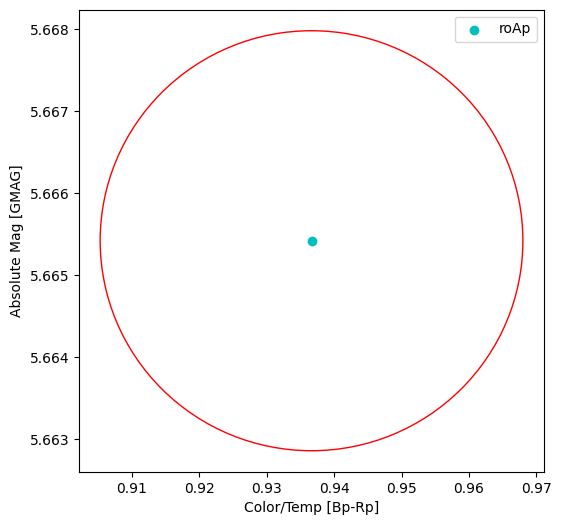

In [23]:
a0 = (a[0][0])
b0 = (b[0][0])
xr0 = (roAp['BP-RP0'])[0]
yr0 = (roAp['GMAG0'])[0]

fig, ax = plt.subplots(1,figsize=(6,6))

ellipse = mpatches.Ellipse(xy=(xr0,yr0),width=b0,height=a0)
ax.add_patch(ellipse)
ellipse.set_facecolor('None')
ellipse.set_edgecolor('r')
print(ax.patches)

plt.scatter(xr0,yr0,c='c',label='roAp')
plt.ylabel('Absolute Mag [GMAG]')
plt.xlabel('Color/Temp [Bp-Rp]')
'''plt.xlim(0.9,0.98)
plt.ylim(5.63,5.7)'''
plt.legend(loc='best')
plt.show()

#### 2.4 Calculating $n\cdot\sigma$ tolerance ellipses with roAp and cluster sigmas

KeyboardInterrupt: 

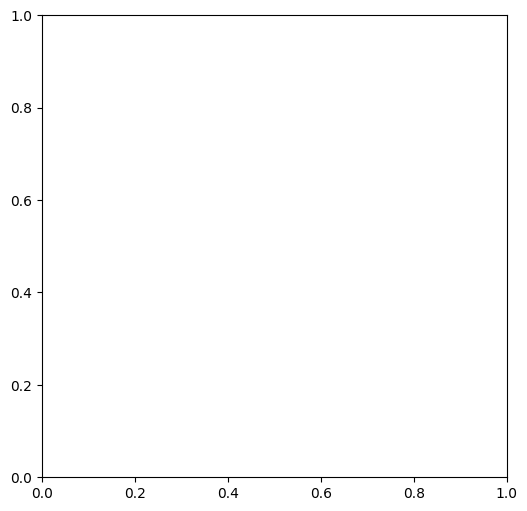

In [19]:
fig, ax = plt.subplots(1,figsize=(6,6))

# Making a for loop to draw an ellipse around each roAp data point
ellipse0 = []
n = 1 # User change the number of sigmas

ellipse0 = [mpatches.Ellipse(xy=((roAp['BP-RP0'])[p],(roAp['GMAG0'])[p]),width=(n*b)[p][i],height=(n*a)[p][i])
           for p in range(len(xr)) for i in range(len(xc))]

for e in ellipse0:
    ax.add_artist(e)
    e.set_facecolor(color='None')
    e.set_edgecolor('r')
e.set_label(f'{n}$\sigma$')

plt.scatter(x=xc,y=yc,marker='*',c='c',label='cluster array',s=1,zorder=2)
plt.scatter(x=xr,y=yr,c='black',label='roAp',s=3,zorder=3)

plt.gca().invert_yaxis()

plt.title('Color Magnitude Diagram FOV with Error Ellipses')
plt.ylabel('Absolute Mag [GMAG]')
plt.xlabel('Color/Temp [Bp-Rp]')
plt.grid(zorder=1)
plt.legend(loc='best')
plt.xlim(-.3,1.3)
plt.ylim(6,-3)
plt.savefig('Data/CMD with Tolerance Ellipses')
plt.show()

In [24]:
gmcet = gmce.transpose()
bp_rp_cet = bp_rp_ce.transpose()
# R squared values for Cluster and roAp mag error
cands = []
n = 1 # User change the number of sigmas
# Calculating the averages
avgx = np.mean(xr)
avgy = np.mean(yr)
# Doing vectorization to classify candidates
for q in range(len(xc)):
    for i in range(len(xr)):
        if (n*abs(rD[i][q])) >= (n*abs(rd[i][q])):
            cands.append({'Designation':(clust['source_id'])[q],'GMAG':(clust['GMAG0'])[q],'GMAG_Error':(gmcet)[q],
                        'BP-RP':(clust['BP-RP0'])[q],'BP-RP_Error':(bp_rp_cet)[q],'Ratio-to-Sigma':((rd)[i][q])/((rD)[i][q])})
cands = pd.DataFrame(cands)
cands.to_csv('Data/roAp_NGC2264_Candidates.txt')
cands.to_csv('Data/roAp_NGC2264_Candidates.csv')
cands.head(n=len(cands))

,Designation,GMAG,GMAG_Error,BP-RP,BP-RP_Error,Ratio-to-Sigma
0,2750634701472259072,5.646861,[0.0055843507428342],0.950123,[0.0692903105743849],0.558639
1,2750737608887097600,5.698233,[0.0034930413598731],0.895374,[0.0725880935864535],0.926483
2,2750787636666201472,5.671187,[0.0020524140025769],0.917185,[0.0480234946208739],0.440327


In [25]:
rax = pd.DataFrame(a)
rax = rax.iloc[86:]
rax = np.array(rax).transpose()
print((rax))

[[0.00507047]
 [0.00314697]
 [0.00376927]
 [0.00903772]
 [0.00384838]
 [0.00744144]
 [0.00279756]
 [0.00382736]
 [0.00837153]
 [0.00428595]
 [0.00288561]
 [0.01007929]
 [0.00281281]
 [0.00427562]
 [0.00657758]
 [0.00527518]
 [0.00322941]
 [0.00547327]
 [0.00278634]
 [0.00298613]
 [0.0027925 ]
 [0.00324621]
 [0.00714663]
 [0.00289865]
 [0.00924943]
 [0.00489411]
 [0.00860545]
 [0.00598017]
 [0.00289867]
 [0.00330644]
 [0.0031064 ]
 [0.00282816]
 [0.00372342]
 [0.01001561]
 [0.00289361]
 [0.01397298]
 [0.00902855]
 [0.00688449]
 [0.0028942 ]
 [0.0046627 ]
 [0.00533651]
 [0.00307871]
 [0.00977349]
 [0.00880734]
 [0.00289751]
 [0.00433102]
 [0.00584643]
 [0.0034414 ]
 [0.00483809]
 [0.00318949]
 [0.01454211]
 [0.00294837]
 [0.00280808]
 [0.00303767]
 [0.0028592 ]
 [0.00608139]
 [0.00279767]
 [0.00537182]
 [0.00298546]
 [0.0027788 ]
 [0.0027833 ]
 [0.00305657]
 [0.00334857]
 [0.00309467]
 [0.00452939]
 [0.01169296]
 [0.002782  ]
 [0.00290291]
 [0.00288467]
 [0.00380088]
 [0.00321633]
 [0.00

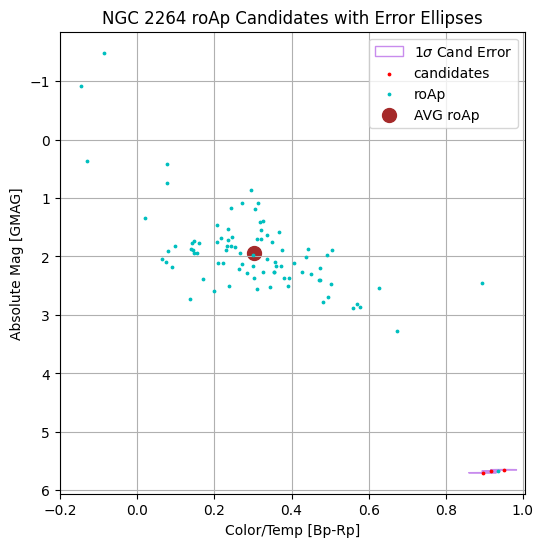

In [26]:
n = 1

ub = cands['BP-RP']
ua = cands['GMAG']
xe = cands['BP-RP_Error']
ye = cands['GMAG_Error']

fig, ax = plt.subplots(1,figsize=(6,6))

ellipse0 = [mpatches.Ellipse(xy=((ub)[p],(ua)[p]),width=(n*xe)[p],height=(n*ye)[p])
           for p in range(len(ua))]
for e1 in ellipse0:
    ax.add_artist(e1)
    e1.set_facecolor(color='None')
    e1.set_edgecolor('#c88ced')
e1.set_label(f'{n}$\sigma$ Cand Error')

#plt.errorbar(ub,ua,yerr=c='red',label='Candidate',s=5,zorder=3)
plt.scatter(x=ub,y=ua,c='r',label='candidates',s=3,zorder=3)
plt.scatter(x=xr,y=yr,c='c',label='roAp',s=3,zorder=2)
plt.scatter(avgx,avgy,c='brown',s=100,label='AVG roAp',zorder=1)

plt.gca().invert_yaxis()

plt.title('NGC 2264 roAp Candidates with Error Ellipses')
plt.ylabel('Absolute Mag [GMAG]')
plt.xlabel('Color/Temp [Bp-Rp]')
plt.grid(zorder=1)
plt.legend(loc='best')
plt.savefig('Data/CMD with Cands')
plt.show()